In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/breast-cancer/Breast_Cancer.csv


In [5]:
df=pd.read_csv("/kaggle/input/breast-cancer/Breast_Cancer.csv")
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [22]:
df.columns

Index(['Age', 'Race', 'Marital Status', '6th Stage', 'differentiate', 'Grade',
       'Tumor Size', 'Estrogen Status', 'Progesterone Status',
       'Regional Node Examined', 'Reginol Node Positive', 'Survival Months',
       'Status', 'T Stage_T1', 'T Stage_T2', 'T Stage_T3', 'T Stage_T4',
       'N Stage_N1', 'N Stage_N2', 'N Stage_N3', 'A Stage_Distant',
       'A Stage_Regional'],
      dtype='object')

In [8]:
# Display the data types and basic statistics
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

In [12]:
df.describe().T.style.background_gradient(cmap="Greens")

,count,mean,std,min,25%,50%,75%,max
Age,4024.000000,53.972167,8.963134,30.000000,47.000000,54.000000,61.000000,69.000000
Tumor Size,4024.000000,30.473658,21.119696,1.000000,16.000000,25.000000,38.000000,140.000000
Regional Node Examined,4024.000000,14.357107,8.099675,1.000000,9.000000,14.000000,19.000000,61.000000
Reginol Node Positive,4024.000000,4.158052,5.109331,1.000000,1.000000,2.000000,5.000000,46.000000
Survival Months,4024.000000,71.297962,22.921430,1.000000,56.000000,73.000000,90.000000,107.000000


In [14]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

In [17]:
# Fill missing values with the median for numerical columns and mode for categorical columns
df['Tumor Size'].fillna(df['Tumor Size'].median())
df['Estrogen Status'].fillna(df['Estrogen Status'].mode()[0])

0       Positive
1       Positive
2       Positive
3       Positive
4       Positive
          ...   
4019    Positive
4020    Positive
4021    Positive
4022    Positive
4023    Positive
Name: Estrogen Status, Length: 4024, dtype: object

In [27]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

categorical_columns = df.select_dtypes(include=['object']).columns

# Encode categorical features
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# Display the first few rows of the modified DataFrame
df[categorical_columns].head()

,6th Stage,differentiate,Grade,Status
0,0,1,3,0
1,2,0,2,0
2,4,0,2,0
3,0,1,3,0
4,1,1,3,0


In [21]:
# One-hot encoding for ordinal features
df.columns = df.columns.str.strip()
df = pd.get_dummies(df, columns=['T Stage', 'N Stage', 'A Stage'])

In [23]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Scale numerical features
df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive']] = scaler.fit_transform(
    df[['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive']]
)


In [31]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Status']) 
y = df['Status']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Displaying the sizes of the train and test sets
print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 3219
Test set size: 805


In [35]:
from sklearn.linear_model import LogisticRegression

# Initialize the logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Fit the model to the data (example with features 'X' and target 'y')
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [36]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the decision tree classifier
decision_tree = DecisionTreeClassifier()

# Fit the model to the data
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [37]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the random forest classifier
random_forest = RandomForestClassifier(n_estimators=100)

# Fit the model to the data
random_forest.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
# Initialize the random forest classifier with specified parameters
rf_classifier = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=3)

# Fit the model to the data
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, min_samples_split=5,
                       n_estimators=200)

In [46]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [45]:
# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Logistic Regression : {accuracy:.2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)

Accuracy of Logistic Regression : 0.90
Confusion Matrix:
[[673  12]
 [ 67  53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       685
           1       0.82      0.44      0.57       120

    accuracy                           0.90       805
   macro avg       0.86      0.71      0.76       805
weighted avg       0.90      0.90      0.89       805



In [43]:
# Make predictions on the test set
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Decision Tree: {accuracy:.2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy of Decision Tree: 0.86
Confusion Matrix:
[[621  64]
 [ 50  70]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       685
           1       0.52      0.58      0.55       120

    accuracy                           0.86       805
   macro avg       0.72      0.74      0.73       805
weighted avg       0.87      0.86      0.86       805



In [44]:

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display the classification report
report = classification_report(y_test, y_pred)

print(f'Accuracy of the Random Forest Classifier: {accuracy:.2f}')

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

print('Classification Report:')
print(report)

Accuracy of the Random Forest Classifier: 0.91
Confusion Matrix:
[[675  10]
 [ 59  61]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95       685
           1       0.86      0.51      0.64       120

    accuracy                           0.91       805
   macro avg       0.89      0.75      0.80       805
weighted avg       0.91      0.91      0.90       805



In [48]:
print("Unique labels in y_test:", np.unique(y_test))
print("Unique labels in y_pred:", np.unique(y_pred))

Unique labels in y_test: [0 1]
Unique labels in y_pred: [0 1]


In [50]:
# Initialize an empty dictionary to store evaluation metrics
evaluation_metrics = {}

# List of models and their names
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': decision_tree,
    'Random Forest': rf_classifier
}

# Loop through each model to evaluate
for model_name, model in models.items():
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label=1)  # 1 corresponds to 'Alive'
    recall = recall_score(y_test, y_pred, pos_label=1)        # 1 corresponds to 'Alive'
    f1 = f1_score(y_test, y_pred, pos_label=1)                # 1 corresponds to 'Alive'
    
    # Store metrics in the dictionary
    evaluation_metrics[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': confusion_matrix(y_test, y_pred),
        'Classification Report': classification_report(y_test, y_pred)
    }

    # Print the evaluation results for the current model
    print(f'--- {model_name} Evaluation ---')
    print(f'Accuracy: {accuracy:.2f}')
    print(f'Precision: {precision:.2f}')
    print(f'Recall: {recall:.2f}')
    print(f'F1 Score: {f1:.2f}')
    print(' ')
    print('Confusion Matrix:')
    print(evaluation_metrics[model_name]['Confusion Matrix'])
    print(' ')
    print('Classification Report:')
    print(evaluation_metrics[model_name]['Classification Report'])
    print('\n')


--- Logistic Regression Evaluation ---
Accuracy: 0.90
Precision: 0.82
Recall: 0.44
F1 Score: 0.57
 
Confusion Matrix:
[[673  12]
 [ 67  53]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.98      0.94       685
           1       0.82      0.44      0.57       120

    accuracy                           0.90       805
   macro avg       0.86      0.71      0.76       805
weighted avg       0.90      0.90      0.89       805



--- Decision Tree Evaluation ---
Accuracy: 0.86
Precision: 0.52
Recall: 0.58
F1 Score: 0.55
 
Confusion Matrix:
[[621  64]
 [ 50  70]]
 
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.91      0.92       685
           1       0.52      0.58      0.55       120

    accuracy                           0.86       805
   macro avg       0.72      0.74      0.73       805
weighted avg       0.87      0.86      0.86       805



--- Random Fores

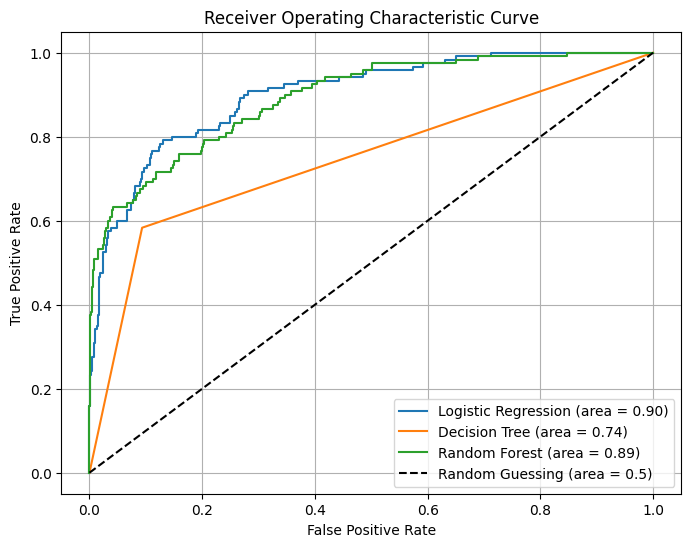

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Initialize a figure for the ROC curve
plt.figure(figsize=(8, 6))

# List of models and their names
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': decision_tree,
    'Random Forest': rf_classifier
}

# Loop through each model to calculate and plot ROC AUC
for model_name, model in models.items():
    # Calculate the ROC AUC score
    y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    
    # Calculate the ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    
    # Plot the ROC curve
    plt.plot(fpr, tpr, label='{} (area = {:.2f})'.format(model_name, roc_auc))

# Plot the diagonal line for no discrimination
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing (area = 0.5)')

# Add labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

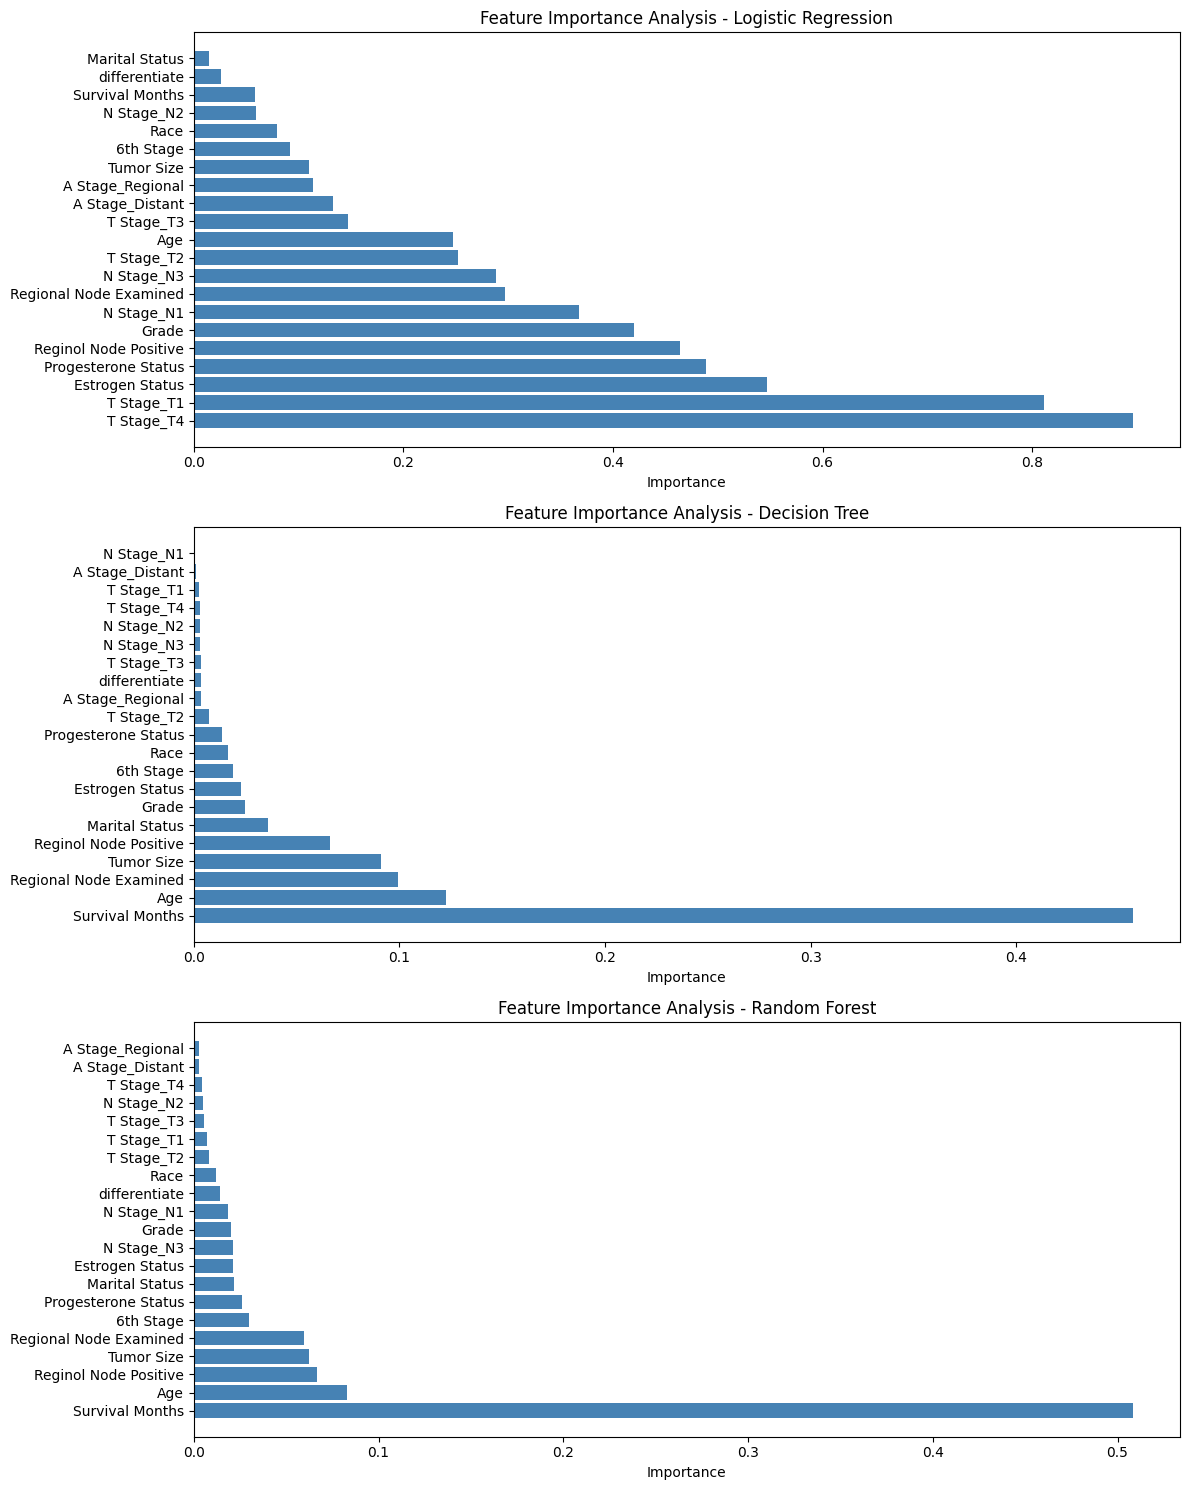

In [53]:
# Initialize a figure for feature importance
plt.figure(figsize=(12, 15))

# Get feature importance from each model
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': decision_tree,
    'Random Forest': rf_classifier
}

# Initialize a list to collect feature importance data for plotting
importance_data = []

# Calculate feature importance for each model
for model_name, model in models.items():
    if model_name == 'Logistic Regression':
        # For Logistic Regression, use the absolute values of the coefficients
        importances = np.abs(model.coef_[0])  # Take the first (and only) row
    else:
        # For Decision Tree and Random Forest, get feature importances
        importances = model.feature_importances_
    
    # Collect the feature importance data
    importance_data.append((model_name, importances))

# Create DataFrame for plotting
for model_name, importances in importance_data:
    feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plotting feature importance for each model
    plt.subplot(3, 1, list(models.keys()).index(model_name) + 1)
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='steelblue')
    plt.xlabel('Importance')
    plt.title(f'Feature Importance Analysis - {model_name}')

plt.tight_layout()
plt.show()